# i - Query SQL
> Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_020_rmt.heart-failure`
```

# ii - Import Libraries
> *Cell* pertama pada *notebook* **harus berisi dan hanya** berisi semua *library* yang digunakan dalam project.

In [1]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np


# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTE


# Buat definisi model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Buat evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Buat cross validation
from sklearn.model_selection import cross_val_score

# Buat import hasil model saving
import joblib

# iii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df = pd.read_csv ("Hearth Failure.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [3]:
# Menampilkan 10 data pertama
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [4]:
# Menampilkan 10 data terakhir
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Penjelasan tiap kolom:

| Kolom      | data_type | Penjelasan |
| :-----------: | :-----------: | ----------- |
|`age`| FLOAT64 | Age|
|`anaemia` | INT64 | Decrease of red blood cells or hemoglobin (boolean) |
|`creatinine_phosphokinase` | INT64 | Level of the CPK enzyme in the blood (mcg/L) |
|`diabetes` | INT64 | If the patient has diabetes (boolean) |
|`ejection_fraction` | INT64 | Percentage of blood leaving the heart at each contraction (percentage) |
|`high_blood_pressure` | INT64 | If the patient has hypetension (boolean) |
|`platelets` | FLOAT64 | Platelets in the blood (kiloplatelets/mL) |
|`serum_creatinine` | FLOAT64 | Level of serum creatinine in the blood (mg/dL) |
|`serum_sodium` | INT64 | Level of serum sodium in the blood (mEq/L) |
|`sex` | INT64 | Woman or man (binary) |
|`smoking` | INT64 | If the patient smokes or not (boolean) |
|`time` | INT64 | Follow-up period (days) |
|`DEATH_EVENT` | INT64 | If the patient deceased during the follow-up period (boolean) |

Untuk Penjelasan dari boolean, berdasarkan data [kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/discussion/193109):

| Kolom  | Penjelasan |
| :-----------: | ----------- |
| Sex | Male = 1, Female =0 |
| Diabetes | 0 = No, 1 = Yes |
| Anaemia | 0 = No, 1 = Yes |
| High_blood_pressure | 0 = No, 1 = Yes |
| Smoking | 0 = No, 1 = Yes |
| DEATH_EVENT | 0 = No, 1 = Yes |

Untuk penjelasan lebih lanjut dari tentang [time](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/discussion/177404#994502):
```
This is a time-to-event problem. The study involved following a set of patients for a set duration of time. The end result during this study is captured in the 2 columns time and death_event.

death_event can be 0 or 1. Coupled with time, it encodes all possible states that a patient can end up in.

- If a patient died on the 20th day, it will be recorded as (20, 1) (notation is (time, death_event) )
- If a patient dropped out of the study on the 20th day, it will be recorded as (20, 0). The 0 here does not mean that the patient never dies, just that they were lost to follow up on the 20th day. Since no one is immortal (yet), they will still die in the future. However, we do know that they did not die up to the 20th day.
```

# iv - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Merubah nama kolom

In [57]:
df.rename(columns={'age': 'Usia',
                       'anaemia': 'Anemia',
                       'creatinine_phosphokinase': 'Kreatinin Fosfokinase', 
                       'diabetes': 'Diabetes',
                       'ejection_fraction': 'Ejection Fraction',
                       'high_blood_pressure': 'Tekanan Darah Tinggi',
                       'platelets': 'Platelet',
                       'serum_creatinine': 'Kreatinin Serum',
                       'serum_sodium': 'Natrium Serum',
                       'sex': 'Jenis Kelamin', 
                       'smoking': 'Perokok',
                       'time': 'Waktu Penangangan',
                       'DEATH_EVENT': 'Meninggal'}
                       , inplace=True)

df

,Usia,Anemia,Kreatinin Fosfokinase,Diabetes,Ejection Fraction,Tekanan Darah Tinggi,Platelet,Kreatinin Serum,Natrium Serum,Jenis Kelamin,Perokok,Waktu Penangangan,Meninggal
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


## Melihat data statistik pada data frame

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Usia,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Kreatinin Fosfokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Ejection Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
Tekanan Darah Tinggi,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Platelet,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Kreatinin Serum,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Natrium Serum,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Jenis Kelamin,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Melihat perbandingan pada beberapa kategori

In [7]:
data_meninggal  = df[df['Meninggal'] == 1][['Usia', 'Anemia', 'Kreatinin Fosfokinase', 'Diabetes',
                                            'Ejection Fraction', 'Tekanan Darah Tinggi', 'Platelet',
                                            'Kreatinin Serum', 'Natrium Serum', 'Jenis Kelamin', 'Perokok', 'Waktu Penangangan']]
data_hidup      = df[df['Meninggal'] == 0][['Usia', 'Anemia', 'Kreatinin Fosfokinase', 'Diabetes',
                                            'Ejection Fraction', 'Tekanan Darah Tinggi', 'Platelet',
                                            'Kreatinin Serum', 'Natrium Serum', 'Jenis Kelamin', 'Perokok', 'Waktu Penangangan']]


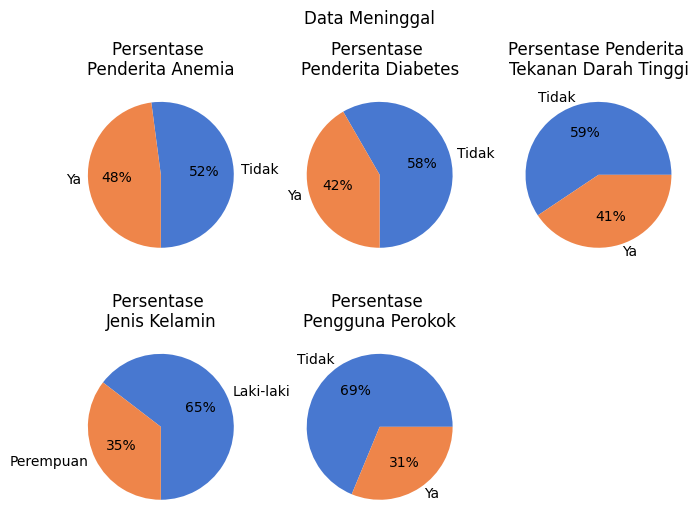

In [8]:
palette_color = sns.color_palette('muted')
plt.figure(figsize = (8, 6))
plt.suptitle ('Data Meninggal')

ax1 = plt.subplot(2, 3, 1)
plt.pie(data_meninggal['Anemia'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=["Tidak", "Ya"])
ax1 = plt.title ('Persentase \nPenderita Anemia')

ax2 = plt.subplot(2, 3, 2)
plt.pie(data_meninggal['Diabetes'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=["Tidak", "Ya"])
ax2 = plt.title ('Persentase \nPenderita Diabetes')

ax3 = plt.subplot(2, 3, 3)
plt.pie(data_meninggal['Tekanan Darah Tinggi'].value_counts(), colors=palette_color, autopct='%.0f%%', labels=["Tidak", "Ya"])
ax3 = plt.title ('Persentase Penderita \nTekanan Darah Tinggi')

ax4 = plt.subplot(2, 3, 4)
plt.pie(data_meninggal['Jenis Kelamin'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=["Laki-laki", "Perempuan"])
ax4 = plt.title ('Persentase \nJenis Kelamin')

ax5 = plt.subplot(2, 3, 5)
plt.pie(data_meninggal['Perokok'].value_counts(), colors=palette_color, autopct='%.0f%%', labels=["Tidak", "Ya"])
ax5 = plt.title ('Persentase \nPengguna Perokok')

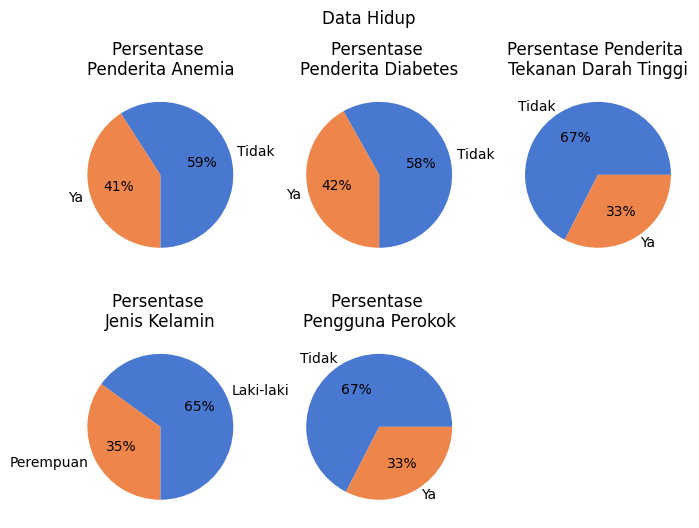

In [9]:
palette_color = sns.color_palette('muted')
plt.figure(figsize = (8, 6))
plt.suptitle ('Data Hidup')

ax1 = plt.subplot(2, 3, 1)
plt.pie(data_hidup['Anemia'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=["Tidak", "Ya"])
ax1 = plt.title ('Persentase \nPenderita Anemia')

ax2 = plt.subplot(2, 3, 2)
plt.pie(data_hidup['Diabetes'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=["Tidak", "Ya"])
ax2 = plt.title ('Persentase \nPenderita Diabetes')

ax3 = plt.subplot(2, 3, 3)
plt.pie(data_hidup['Tekanan Darah Tinggi'].value_counts(), colors=palette_color, autopct='%.0f%%', labels=["Tidak", "Ya"])
ax3 = plt.title ('Persentase Penderita \nTekanan Darah Tinggi')

ax4 = plt.subplot(2, 3, 4)
plt.pie(data_hidup['Jenis Kelamin'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=["Laki-laki", "Perempuan"])
ax4 = plt.title ('Persentase \nJenis Kelamin')

ax5 = plt.subplot(2, 3, 5)
plt.pie(data_hidup['Perokok'].value_counts(), colors=palette_color, autopct='%.0f%%', labels=["Tidak", "Ya"])
ax5 = plt.title ('Persentase \nPengguna Perokok')

## Visualisasi korelasi antar kolom

<Axes: >

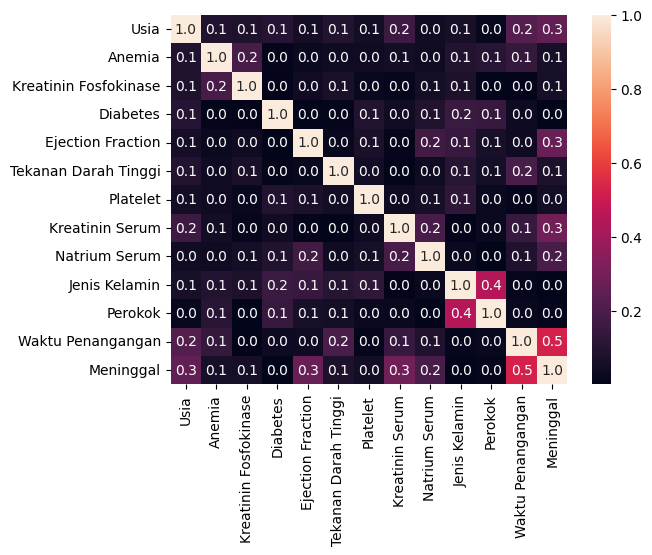

In [10]:
sns.heatmap(df.corr().abs(), annot=True, fmt=".1f")


In [11]:
korelasi = df.corr().melt(var_name="column",  value_name="Value", ignore_index=False)
korelasi[korelasi.index=="Meninggal"]

,column,Value
Meninggal,Usia,0.253729
Meninggal,Anemia,0.066270
Meninggal,Kreatinin Fosfokinase,0.062728
Meninggal,Diabetes,-0.001943
Meninggal,Ejection Fraction,-0.268603
Meninggal,Tekanan Darah Tinggi,0.079351
Meninggal,Platelet,-0.049139
Meninggal,Kreatinin Serum,0.294278
Meninggal,Natrium Serum,-0.195204
Meninggal,Jenis Kelamin,-0.004316


Berdasarkan hasil diatas, yang berkorelasi dengan kolom Meninggal adalah Usia, Ejection Fraction, Kreatinin Serum, Natrium Serum, dan Waktu Penanganan. 

## Melihat persebaran pada tiap kategori

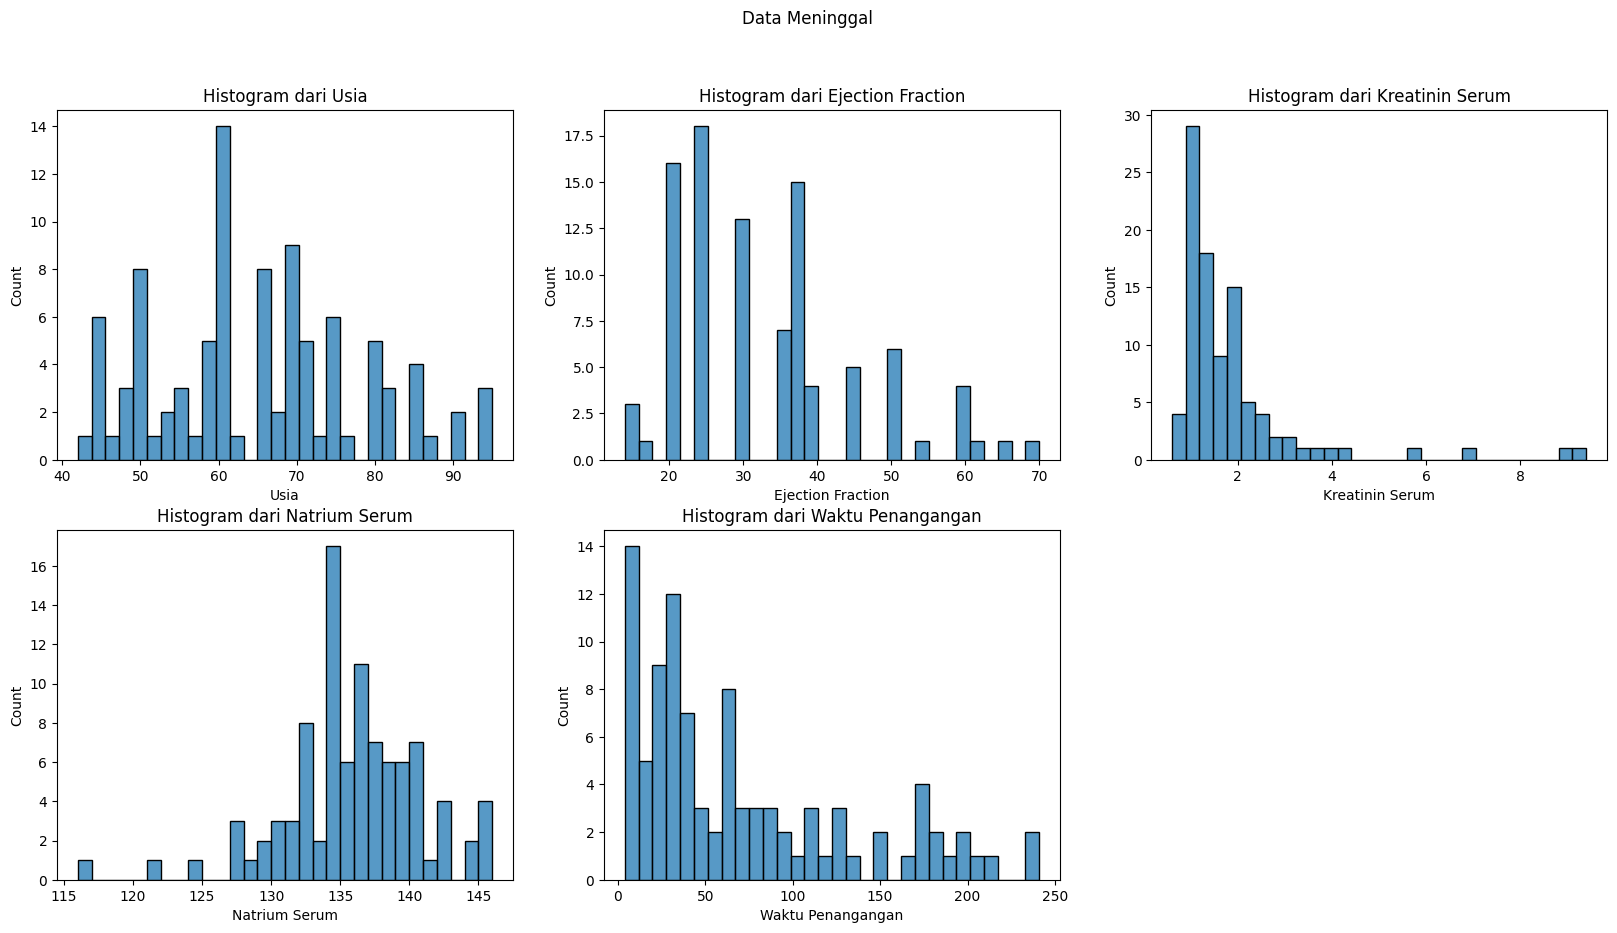

In [68]:
plt.figure(figsize=(20, 10))
plt.suptitle ('Data Meninggal')

ax1 = plt.subplot(2, 3, 1)
sns.histplot(data_meninggal['Usia'], bins=30)
ax1 = plt.title('Histogram dari Usia')

ax2 = plt.subplot(2, 3, 2)
sns.histplot(data_meninggal['Ejection Fraction'], bins=30)
ax2 = plt.title('Histogram dari Ejection Fraction')

ax3 = plt.subplot(2, 3, 3)
sns.histplot(data_meninggal['Kreatinin Serum'], bins=30)
ax3 = plt.title('Histogram dari Kreatinin Serum')

ax4 = plt.subplot(2, 3, 4)
sns.histplot(data_meninggal['Natrium Serum'], bins=30)
ax4 = plt.title('Histogram dari Natrium Serum')

ax5 = plt.subplot(2, 3, 5)
sns.histplot(data_meninggal['Waktu Penangangan'], bins=30)
ax5 = plt.title('Histogram dari Waktu Penangangan')

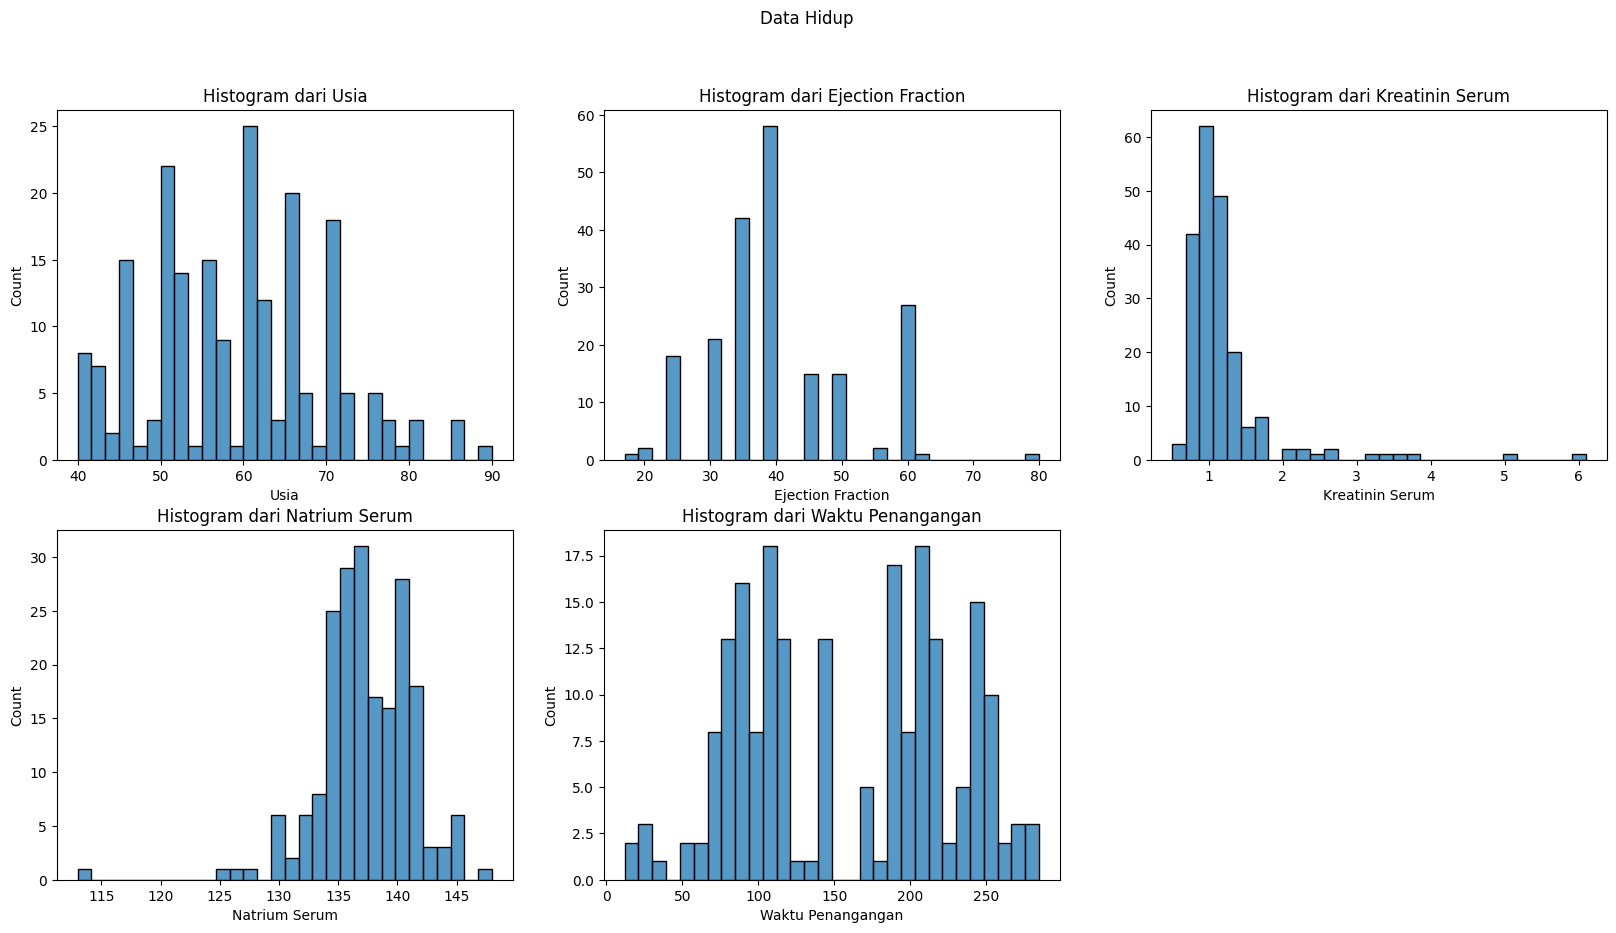

In [69]:
plt.figure(figsize=(20, 10))
plt.suptitle ('Data Hidup')

ax1 = plt.subplot(2, 3, 1)
sns.histplot(data_hidup['Usia'], bins=30)
ax1 = plt.title('Histogram dari Usia')

ax2 = plt.subplot(2, 3, 2)
sns.histplot(data_hidup['Ejection Fraction'], bins=30)
ax2 = plt.title('Histogram dari Ejection Fraction')

ax3 = plt.subplot(2, 3, 3)
sns.histplot(data_hidup['Kreatinin Serum'], bins=30)
ax3 = plt.title('Histogram dari Kreatinin Serum')

ax4 = plt.subplot(2, 3, 4)
sns.histplot(data_hidup['Natrium Serum'], bins=30)
ax4 = plt.title('Histogram dari Natrium Serum')

ax5 = plt.subplot(2, 3, 5)
sns.histplot(data_hidup['Waktu Penangangan'], bins=30)
ax5 = plt.title('Histogram dari Waktu Penangangan')


# v - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Split X (Features) dan y (Target)

In [13]:
X = df.drop(['Meninggal'], axis=1)
y = df['Meninggal']

print (X.shape)
print (y.value_counts())

(299, 12)
Meninggal
0    203
1     96
Name: count, dtype: int64


In [14]:
X, y = SMOTE(sampling_strategy='minority').fit_resample(X, y)

X = pd.DataFrame(X, columns=X.columns)
y.value_counts()

Meninggal
1    203
0    203
Name: count, dtype: int64

## Split Train-Set dan Test-Set

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (324, 12)
X Test Size: (82, 12)

y Train Size (324,)
y Test Size: (82,)


In [16]:
X_train.drop(['Diabetes', 'Platelet', 'Jenis Kelamin', 'Perokok'], axis=1, inplace=True)
X_test.drop(['Diabetes', 'Platelet', 'Jenis Kelamin', 'Perokok'], axis=1, inplace=True)

## Handle Missing Value

### X_train
> Tidak adanya data null pada X_train

In [17]:
X_train.isnull().sum()

Usia                     0
Anemia                   0
Kreatinin Fosfokinase    0
Ejection Fraction        0
Tekanan Darah Tinggi     0
Kreatinin Serum          0
Natrium Serum            0
Waktu Penangangan        0
dtype: int64

### X_test
> Tidak adanya data null pada X_test

In [18]:
X_test.isnull().sum()       

Usia                     0
Anemia                   0
Kreatinin Fosfokinase    0
Ejection Fraction        0
Tekanan Darah Tinggi     0
Kreatinin Serum          0
Natrium Serum            0
Waktu Penangangan        0
dtype: int64

### y_train
> Tidak adanya data null pada y_train

In [19]:
y_train.isnull().sum()

0

### y_test
> Tidak adanya data null pada y_test

In [20]:
y_test.isnull().sum()

0

## Handle Outlier

In [21]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['Usia', 'Ejection Fraction', 'Kreatinin Serum', 'Natrium Serum', 'Waktu Penangangan'])

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)

# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Usia': 27.5, 'Ejection Fraction': 3.75, 'Kreatinin Serum': -0.04999999999999982, 'Natrium Serum': 126.5, 'Waktu Penangangan': -171.5}
Right Tail Caps :  {'Usia': 95.5, 'Ejection Fraction': 65.75, 'Kreatinin Serum': 2.75, 'Natrium Serum': 146.5, 'Waktu Penangangan': 400.5}


In [22]:
print('X_train Dataframe - Before Capping')
print(X_train.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_t.describe())

X_train Dataframe - Before Capping
             Usia      Anemia  Kreatinin Fosfokinase  Ejection Fraction  \
count  324.000000  324.000000             324.000000         324.000000   
mean    62.164828    0.367284             621.148148          36.694444   
std     11.605822    0.482810             994.890872          11.808161   
min     40.000000    0.000000              47.000000          14.000000   
25%     53.000000    0.000000             132.000000          27.000000   
50%     61.947158    0.000000             318.500000          35.000000   
75%     70.000000    1.000000             582.000000          42.500000   
max     95.000000    1.000000            7861.000000          80.000000   

       Tekanan Darah Tinggi  Kreatinin Serum  Natrium Serum  Waktu Penangangan  
count            324.000000       324.000000     324.000000         324.000000  
mean               0.317901         1.576550     136.064815         111.425926  
std                0.466381         1.201164  

## Feature Selection

In [23]:
numeric_feature = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_feature)
print ('Kolom kategori : ', categorical_features)

Kolom numeric :  ['Usia', 'Anemia', 'Kreatinin Fosfokinase', 'Ejection Fraction', 'Tekanan Darah Tinggi', 'Kreatinin Serum', 'Natrium Serum', 'Waktu Penangangan']
Kolom kategori :  []


In [24]:
# Menggunakan pipeline agar mempersingkat coding, dari Scaling, Encoding, dan Concate
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_feature)])

pipe = Pipeline(steps=[("preprocessor", preprocessor)])

pipe.fit(X_train_t, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Usia', 'Anemia',
                                                   'Kreatinin Fosfokinase',
                                                   'Ejection Fraction',
                                                   'Tekanan Darah Tinggi',
                                                   'Kreatinin Serum',
                                                   'Natrium Serum',
                                                   'Waktu Penangangan'])]))])

- Pada numeric scaler, digunakan StandardScaler karena datanya terdistribusi secara normal.

# vi - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Random Forest

In [25]:
# Mendefinisikan model Random Forest
model_rfc = RandomForestClassifier()

## Algoritma Boosting
> AdaBoost

In [26]:
model_abc = AdaBoostClassifier()

# vii - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Random Forest

In [27]:
model_rfc.fit(X_train_t, y_train)

RandomForestClassifier()

## Algoritma Boosting

In [28]:
model_abc.fit(X_train_t, y_train)

AdaBoostClassifier()

# viii - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**



## Cross Validation

### Random Forest

In [29]:
score_train_cross_val_rfc = cross_val_score (model_rfc,
                                            X_train_t, 
                                            y_train,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_rfc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_rfc.std())

Score - Mean - Cross Validation :  0.8641975308641975
Score - Std - Cross Validation  :  0.03055399671793727


## Algoritma Boosting

In [30]:
score_train_cross_val_abc = cross_val_score (model_abc,
                                            X_train_t, 
                                            y_train,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_abc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_abc.std())


Score - Mean - Cross Validation :  0.79320987654321
Score - Std - Cross Validation  :  0.02430249343830803


### Algoritma Terbaik

In [31]:
algoritma_terbaik = pd.DataFrame({
                    'Mean': 
                    [
                    score_train_cross_val_rfc.mean() * 100,
                    score_train_cross_val_abc.mean() * 100],
                    'Std': 
                    [
                    score_train_cross_val_rfc.std() * 100,
                    score_train_cross_val_abc.std() * 100]
                    }, 
                    index = ["Random Forest", "AdaBoost"])
algoritma_terbaik

,Mean,Std
Random Forest,86.419753,3.055400
AdaBoost,79.320988,2.430249


Berdasarkan nilai pada tabel diatas, digunakan model Random Forest karena nilai Mean dan Stdnya bagus

## Hyperparameter Tuning

In [32]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'random_state': [1509]
}

# Mendefinisikan model Random Forest
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, param_grid)
grid_rfc.fit(X_train_t, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500], 'random_state': [1509]})

In [33]:
param_grid = { 
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state': [1509]
}

# Mendefinisikan model Random Forest
abc = AdaBoostClassifier()
grid_abc = GridSearchCV(abc, param_grid)
grid_abc.fit(X_train_t, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30],
                         'random_state': [1509]})

### Random Forest

Confusion Matrix Data Train Random Forest Sebelum Hypertuning: 
 [[161   0]
 [  0 163]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       163

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

Confusion Matrix Data Test Random Forest Sebelum Hypertuning: 
 [[40  2]
 [ 4 36]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.95      0.90      0.92        40

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



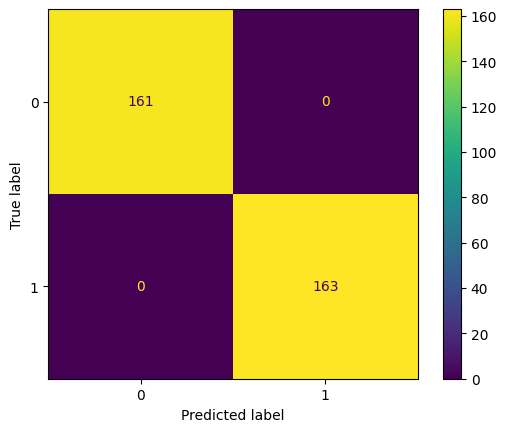

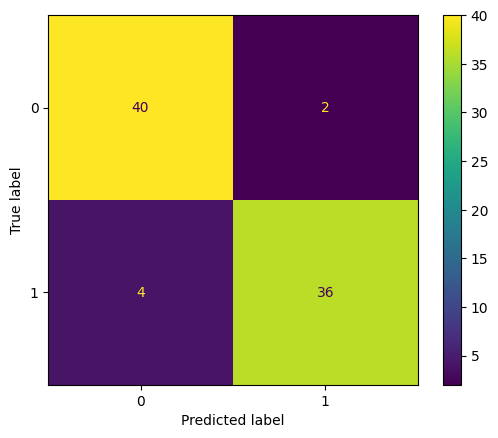

In [34]:
# Membuat prediksi Random Forest sebelum hypertuning
y_pred_rfc_train = model_rfc.predict(X_train_t)
y_pred_rfc_test = model_rfc.predict(X_test)

# Memperlihatkan confusion_matrix
cm_train_rfc = confusion_matrix(y_train, y_pred_rfc_train)
print('Confusion Matrix Data Train Random Forest Sebelum Hypertuning: \n', cm_train_rfc)
print(classification_report(y_train, y_pred_rfc_train))

cm_test_rfc = confusion_matrix(y_test, y_pred_rfc_test)
print('Confusion Matrix Data Test Random Forest Sebelum Hypertuning: \n', cm_test_rfc)
print(classification_report(y_test, y_pred_rfc_test))

ConfusionMatrixDisplay(cm_train_rfc).plot()
ConfusionMatrixDisplay(cm_test_rfc).plot()

Confusion Matrix Data Train Random Forest Setelah Hypertuning: 
 [[154   7]
 [  6 157]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.96      0.96      0.96       163

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.96      0.96      0.96       324

Confusion Matrix Data Test Random Forest Setelah Hypertuning: 
 [[41  1]
 [ 4 36]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.97      0.90      0.94        40

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



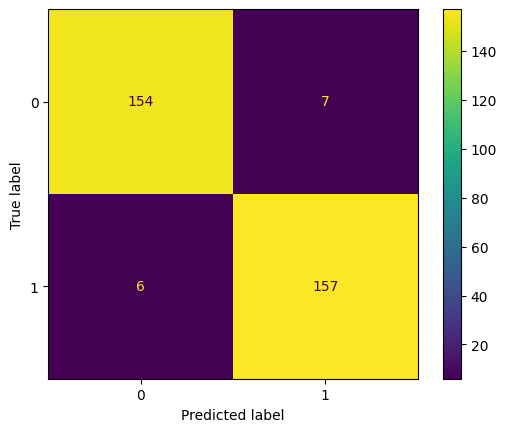

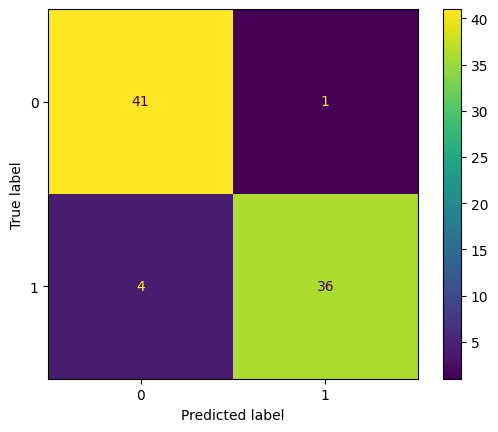

In [35]:
# Membuat prediksi Random Forest setelah hypertuning
best_model_rfc = grid_rfc.best_estimator_

y_pred_train = best_model_rfc.predict(X_train_t)
y_pred_test = best_model_rfc.predict(X_test)

# Memperlihatkan confusion_matrix
cm_train_rfc_ht = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train Random Forest Setelah Hypertuning: \n', cm_train_rfc_ht)
print(classification_report(y_train, y_pred_train))

cm_test_rfc_ht = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test Random Forest Setelah Hypertuning: \n', cm_test_rfc_ht)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train_rfc_ht).plot()
ConfusionMatrixDisplay(cm_test_rfc_ht).plot()

### AdaBoost

Confusion Matrix Data Train AdaBoost Sebelum Hypertuning: 
 [[147  14]
 [ 14 149]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       161
           1       0.91      0.91      0.91       163

    accuracy                           0.91       324
   macro avg       0.91      0.91      0.91       324
weighted avg       0.91      0.91      0.91       324

Confusion Matrix Data Test AdaBoost Sebelum Hypertuning: 
 [[37  5]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.87      0.82      0.85        40

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82



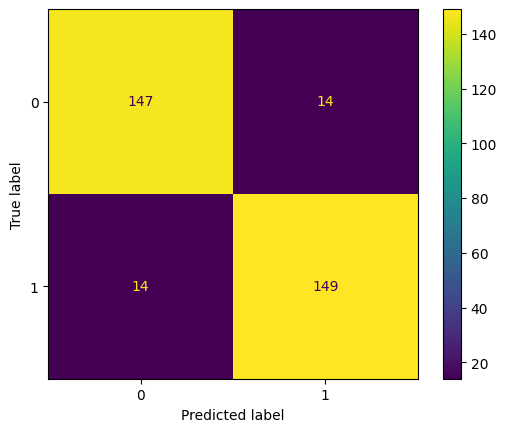

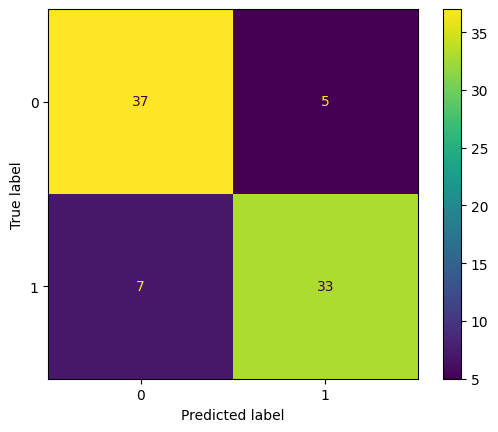

In [36]:
# Membuat prediksi Random Forest sebelum hypertuning
y_pred_abc_train = model_abc.predict(X_train_t)
y_pred_abc_test = model_abc.predict(X_test)

# Memperlihatkan confusion_matrix
cm_train_abc = confusion_matrix(y_train, y_pred_abc_train)
print('Confusion Matrix Data Train AdaBoost Sebelum Hypertuning: \n', cm_train_abc)
print(classification_report(y_train, y_pred_abc_train))

cm_test_abc = confusion_matrix(y_test, y_pred_abc_test)
print('Confusion Matrix Data Test AdaBoost Sebelum Hypertuning: \n', cm_test_abc)
print(classification_report(y_test, y_pred_abc_test))

ConfusionMatrixDisplay(cm_train_abc).plot()
ConfusionMatrixDisplay(cm_test_abc).plot()

Confusion Matrix Data Train AdaBoost Setelah Hypertuning: 
 [[143  18]
 [ 20 143]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       161
           1       0.89      0.88      0.88       163

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324

Confusion Matrix Data Test AdaBoost Setelah Hypertuning: 
 [[39  3]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        42
           1       0.91      0.80      0.85        40

    accuracy                           0.87        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.87      0.87      0.87        82



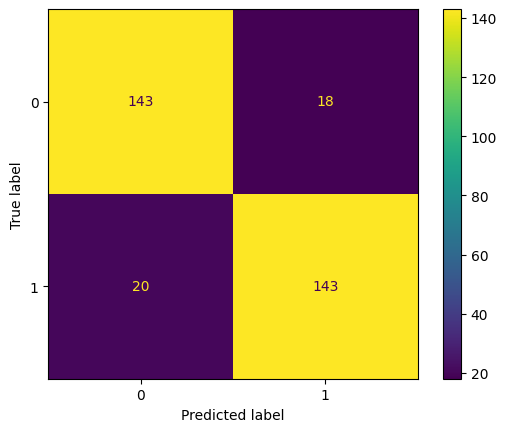

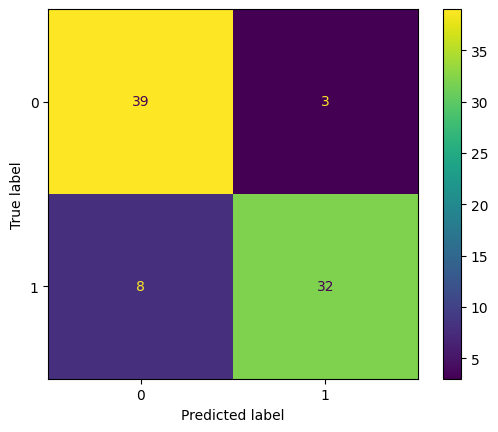

In [37]:
# Membuat prediksi Random Forest setelah hypertuning
best_model_abc = grid_abc.best_estimator_

y_pred_train = best_model_abc.predict(X_train_t)
y_pred_test = best_model_abc.predict(X_test)

# Memperlihatkan confusion_matrix
cm_train_abc_ht = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train AdaBoost Setelah Hypertuning: \n', cm_train_abc_ht)
print(classification_report(y_train, y_pred_train))

cm_test_abc_ht = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test AdaBoost Setelah Hypertuning: \n', cm_test_abc_ht)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train_abc_ht).plot()
ConfusionMatrixDisplay(cm_test_abc_ht).plot()

# ix - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [70]:
# Save the Files

joblib.dump(best_model_rfc, "best_model1.pkl")
joblib.dump(best_model_abc, "best_model2.pkl")


['best_model2.pkl']

# x - Model Inference
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [71]:
load_model_rfc = joblib.load("best_model1.pkl")
load_model_abc = joblib.load("best_model2.pkl")

In [55]:
new_data = pd.DataFrame({
    'Usia': [50], 
    'Anemia': [1], 
    'Kreatinin Fosfokinase': [208], 
    'Ejection Fraction': [60], 
    'Tekanan Darah Tinggi': [5], 
    'Kreatinin Serum': [1], 
    'Natrium Serum': [150], 
    'Waktu Penangangan': [200]
})
new_data

,Usia,Anemia,Kreatinin Fosfokinase,Ejection Fraction,Tekanan Darah Tinggi,Kreatinin Serum,Natrium Serum,Waktu Penangangan
0,50,1,208,60,5,1,150,200


In [73]:
new_data_pred_rfc= load_model_rfc.predict(new_data)

print("Hasil prediksi dari pemodelan Random Forest :", new_data_pred_rfc)

new_data_pred_abc= load_model_abc.predict(new_data)

print("Hasil prediksi dari pemodelan AdaBoost :",new_data_pred_abc)

Hasil prediksi dari pemodelan Random Forest : [0]
Hasil prediksi dari pemodelan AdaBoost : [0]


# xi - Pengambilan Kesimpulan
> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:

1. Dari EDA, terlihat bahwa:
    - Berdasarkan korelasi antar kolom, yang berkorelasi dengan kolom Meninggal adalah Usia, Ejection Fraction, Kreatinin Serum, Natrium Serum, dan Waktu Penanganan. 

    - Secara mengejutkan data yang meninggal karena gagal jantung tidak bergantung pada gejala-gejala penyakit seperti Anemia, Diabetes, Tekanan Darah Tinggi, ataupun jenis kelamin dan merokok tidaknya pasien, sedangkan data yang hidup didominasi oleh yang tidak memiliki gejala penyakit dan bukan perokok.
    
2. Berdasarkan Model Evaluation:
    - Pada dua model yang dilakukan Cross Validation, model Random Forest lebih tinggi akurasinya dibandingkan AdaBoost, meskipun standar deviasinya juga lebih besar. Setelah dilakukannya Hypermeter Tuning pada model Random Forest, dari yang sebelumnya Overfit menjadi Goodfit, hal yang sama terjadi pada model AdaBoost.
    - Pada model Random Forest, model tersebut dapat memprediksi dengan baik pasien yang meninggal ataupun tidak, sedikit yang salah prediksi seperti pasien yang seharusnya tidak meninggal tetapi dianggap meninggal. Sebanyak 154 pasien yang diprediksi hidup dan memang hidup, sedangkan 6 pasien yang diprediksi hidup tetapi dianggap meninggal.


Conceptual Problems

> Jelaskan latar belakang adanya bagging dan cara kerja bagging !
- Bagging adalah teknik yang menggabungkan hasil prediksi dari beberapa model yang dilatih secara sendiri-sendiri pada sampel yang diambil secara acak untuk meningkatkan akurasi dan stabilitas model prediksi, dan dilakukan pemilihan model prediksi berdasarkan voting / average score dari model yang digabungkan pada saat melakukan bagging
- Cara Kerja bagging memilih sampel random dari dataset, dan dibuatkan model dari sampel tersebut.

> Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Random Forest menggunakan metode bagging dan decision tree sebagai individual model, sedangkan AdaBoost menggunakan metode boosting yang dapat menggunakan decesion tree. 

- Pada Random Forest, setiap pohon beroperasi secara independen dan hasil akhirnya diperoleh berdasarkan voting, sedangkan AdaBoost setiap pohon diberikan nilai yang kemudian nilai tersebut digunakan lagi pada pohon berikutnya, sehingga apabila terdapat kesalahan pada pohon sebelumnya, dapat mempengaruhi hasil modelnya
